# Programming Hidden Markov Models (60 P)

In this exercise, you will experiment with hidden Markov models, in particular, applying them to modeling character sequences, and analyzing the learned solution. As a starting point, you are provided in the file `hmm.py` with a basic implementation of an HMM and of the Baum-Welch training algorithm. The names of variables used in the code and the references to equations are taken from the HMM paper by Rabiner et al. downloable from ISIS. In addition to the variables described in this paper, we use two additional variables: $Z$ for the emission probabilities of observations $O$, and $\psi$ (i.e. psi) for collecting the statistics of Equation (40c).


##Question 1: Analysis of a small HMM (30 P)

We first look at a toy example of an HMM trained on a binary sequence. The training procedure below consists of 100 iterations of the Baum-Welch procedure. It runs the HMM learning algorithm for some toy binary data and prints the parameters learned by the HMM (i.e. matrices $A$ and $B$).

###Question 1a: Qualitative Analysis (15 P)

* *Run* the code several times to check that the behavior is consistent.
* *Describe* qualitatively the solution $A,B$ learned by the model.
* *Explain* how the solution $\lambda = (A,B)$ relates to the sequence of observations $O$ that has been modeled.


In [3]:
import numpy,hmm

O = numpy.array([1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1,
                 0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,
                 0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,
                 0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,
                 1,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,1,
                 0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,
                 0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0,0])

 
hmmtoy = hmm.HMM(4,2)

for k in range(100):
    hmmtoy.loaddata(O)
    hmmtoy.forward()
    hmmtoy.backward()
    hmmtoy.learn()

print('A')
print("\n".join([" ".join(['%.3f'%a for a in aa]) for aa in hmmtoy.A]))
print(' ')
print('B')
print("\n".join([" ".join(['%.3f'%b for b in bb]) for bb in hmmtoy.B]))
print(' ')
print('Pi')
print("\n".join(['%.3f'%b for b in hmmtoy.Pi]))


A
0.000 0.000 0.000 1.000
0.000 0.000 1.000 0.000
1.000 0.000 0.000 0.000
0.000 1.000 0.000 0.000
 
B
0.880 0.120
0.720 0.280
0.800 0.200
0.000 1.000
 
Pi
0.000
0.000
0.000
1.000


$Solution 1a :$  
  
* from  the result of the code, we know that there are four hidden state in model, one state will 100 percent transfer to   next state in next round and set up a state cycle. from matrix B, we can know that one of the state only emmiss "1", and the other 3 states have around 80 percent probability to emiss "0". Combine with lamda and observation sequence, we can infer that "0" is more consistent than "1" and there must be a "1" every 4 element if we set the first element in the observation sequence as the starting point 

In [43]:
print('probablity same as B : ')
print()
for i in range(4):
    h = sum(O[i::4])/float(len(O[i::4]))
    t = 1 - h
    print (h,"",t)

probablity same as B : 

1.0  0.0
0.28  0.72
0.2  0.8
0.12  0.88


* As you can see the distribution after every fourth flip is as same as B.

###Question 1b: Finding the best number $N$ of hidden states (15 P)

For the same sequence of observations as in Question 1a, we would like to determine automatically what is a good number of hidden states $N = \mathrm{card}(S)$ for the model.

* *Split* the sequence of observations into a training and test set (you can assume stationarity).
* *Train* the model on the training set for several iteration (e.g. 100 iterations) and for multiple parameter $N$.
* *Show* for each choice of parameter $N$ the log-probability $\log p(O | \lambda)$ for the test set. (If the results are unstable, perform several trials of the same experiment for each parameter $N$.)
* *Explain* in the light of this experiment what is the best parameter $N$.

In [21]:
# solution for 1.b


S = [2,4,8,16]
for s in range(len(S)):
    print "N =",S[s]
    for r in range(4):  
        tt = numpy.random.choice(len(O),int(0.5*len(O)), replace=False)
        train = O[tt]
        test = numpy.delete(O, tt)
        hmmtoy = hmm.HMM(S[s],2)
        for k in range(100):
            hmmtoy.loaddata(train)
            hmmtoy.forward()
            hmmtoy.backward()
            hmmtoy.learn()
        A = hmmtoy.A
        B = hmmtoy.B
        Pi = hmmtoy.Pi 
        # creat and fill Alpha martix for testing set
        Alpha_test = numpy.zeros([S[s], len(test)])
        Alpha_test[:,0] = numpy.dot(B[:,test[0]], Pi)
        for t in range(1,len(test)):
                Alpha_test[:,t] = numpy.dot(numpy.diag(B[:,test[t]]),numpy.dot(A.T,Alpha_test[:,t-1]))
        # sum up the last column of Alpha matrix and calculate the log probability        
        Prob_test = numpy.sum(Alpha_test[:,-1])
        logP_test = numpy.log(Prob_test)
        # creat and fill Alpha martix for train set
        Alpha_train = numpy.zeros([S[s], len(train)])
        Alpha_train[:,0] = numpy.dot(B[:,train[0]], Pi)
        for t in range(1,len(train)):
                Alpha_train[:,t] = numpy.dot(numpy.diag(B[:,train[t]]),numpy.dot(A.T,Alpha_train[:,t-1]))
        # sum up the last column of Alpha matrix and calculate the log probability        
        Prob_train = numpy.sum(Alpha_train[:,-1])
        logP_train = numpy.log(Prob_train)        
        print "trial", r, "logptrain=", logP_train, "logptest=", logP_test 

N = 2
trial 0 logptrain= -61.4372782489 logptest= -72.4165892924
trial 1 logptrain= -64.7228402078 logptest= -66.7611031577
trial 2 logptrain= -67.2785291801 logptest= -66.9198971113
trial 3 logptrain= -66.4688148345 logptest= -69.8372613217
N = 4
trial 0 logptrain= -63.902194053 logptest= -65.2220425094
trial 1 logptrain= -60.1599262302 logptest= -87.6685647486
trial 2 logptrain= -63.8127923767 logptest= -62.8661868924
trial 3 logptrain= -63.1961800566 logptest= -69.6351247313
N = 8
trial 0 logptrain= -52.2539313588 logptest= -221.304573566
trial 1 logptrain= -57.8868770454 logptest= -88.0409021513
trial 2 logptrain= -52.8513017494 logptest= -99.3808398959
trial 3 logptrain= -49.6249782392 logptest= -138.298025064
N = 16
trial 0 logptrain= -44.2589933716 logptest= -197.999003006
trial 1 logptrain= -39.3076848532 logptest= -318.224586355
trial 2 logptrain= -43.5645277761 logptest= -246.586453891
trial 3 logptrain= -38.6013716762 logptest= -343.750348378


In [ ]:
# solution to 1.b
# I prefer to use either N = 2  or  N = 4, because the probability is more stable in the testing set for both model.

## Question 2: Text modeling and generation (30 P)

We would like to train an HMM on character sequences taken from English text. We use the 20 newsgroups dataset that is accessible via scikits-learn http://scikit-learn.org/stable/datasets/twenty_newsgroups.html. (For this, you need to install scikits-learn if not done already.) Documentation is available on the website. The code below allows you to (1) read the dataset, (2) sample HMM-readable sequences from it, and (3) convert them back into string of characters.

In [83]:
from sklearn.datasets import fetch_20newsgroups

# Download a subset of the newsgroup dataset
newsgroups_train = fetch_20newsgroups(subset='train',categories=['sci.med'])
newsgroups_test  = fetch_20newsgroups(subset='test' ,categories=['sci.med'])

# Sample a sequence of T characters from the dataset
# that the HMM can read (0=whitespace 1-26=A-Z).
#
# Example of execution:
# O = sample(newsgroups_train.data)
# O = sample(newsgroups_test.data)
#
def sample(data,T=50):
    i = numpy.random.randint(len(data))
    O = data[i].upper().replace('\n',' ')
    O = numpy.array([ord(s) for s in O])
    O = numpy.maximum(O[(O>=65)*(O<90)+(O==32)]-64,0)
    j = numpy.random.randint(len(O)-T)
    return O[j:j+T]

# Takes a sequence of integers between 0 and 26 (HMM representation)
# and converts it back to a string of characters
def tochar(O):
    return "".join(["%s"%chr(o) for o in (O+32*(O==0)+64*(O>0.5))])

### Question 2a (15 P)

In order to train the HMM, we use a stochastic optimization algorithm where the Baum-Welch procedure is applied to randomly drawn sequences of $T=50$ characters at each iteration. The HMM has 27 visible states (A-Z + whitespace) and 200 hidden states. Because the Baum-Welch procedure optimizes for the sequence taken as input, and no necessarily the full text, it can take fairly large steps in the parameter space, which is inadequate for stochastic optimization. We consider instead for the parameters $\lambda = (A,B,\Pi)$ the update rule $\lambda^{new} = (1-\gamma) \lambda + \gamma \bar \lambda$, where $\bar \lambda$ contains the candidate parameters obtained from Equations 40a-c. A reasonable value for $\gamma$ is $0.1$.

* *Create* a new class `HMMChar` that extends the class `HMM` provided in `hmm.py`.
* *Implement* for this class a new method `HMMchar.learn(self)` that overrides the original methods, and implements the proposed update rule instead.
* *Implement* the stochastic training procedure and run it.
* *Monitor* $\log p(O|\lambda)$ on the test set at multiple iterations for sequences of same length as the one used for training. (Hint: for less noisy log-probability estimates, use several sequences or a moving average.)

In [84]:
class HMMChar(hmm.HMM):
    #Solution for 2a.
    def learn(self, r=0.1):
        A_hmm,B_hmm,Pi_hmm = self.A.copy(), self.B.copy(), self.Pi.copy()
        #Calling super function
        super(HMMChar, self).learn()
        
        self.A = (1-r)*A_hmm + r*self.A
        self.B = (1-r)*B_hmm + r*self.B
        self.Pi = (1-r)*Pi_hmm + r*self.Pi
        
    #Solution of 2b
    def generate(self, T):
        chars = []
        q = numpy.random.choice(200, p=hmmchar.Pi)
        for _ in range(T):
            chars.append(numpy.random.choice(27, p=hmmchar.B[q, :]))
            q = numpy.random.choice(200, p=hmmchar.A[q, :])
        return numpy.array(chars)


In [85]:
hmmchar = HMMChar(200,27)
trainsample = lambda: sample(newsgroups_train.data)
testsample  = lambda: sample(newsgroups_test.data)

prob_tests = []

for i in range(1000):
    hmmchar.loaddata(trainsample())
    hmmchar.forward()
    hmmchar.backward()
    hmmchar.learn()

    prob_train = numpy.log(sum(hmmchar.beta[0]))

    hmmchar.loaddata(testsample())
    hmmchar.forward()
    hmmchar.backward()
    prob_test = numpy.log(sum(hmmchar.beta[0]))
    prob_tests.append(prob_test)


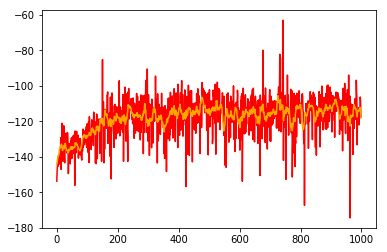

In [86]:
import matplotlib.pyplot as plt

prob_test_mean = [numpy.mean(prob_tests[i:i+10]) for i in range(0, 1000)]
plt.plot(prob_tests, color='red')
plt.plot(numpy.arange(0, 1000), prob_test_mean, color='orange')
plt.show()

### Question 2b (15 P)

In order to visualize what the HMM has learned, we would like to generate random text from it. A well-trained HMM should generate character sequences that have some similarity with the text it has been trained on.

* *Implement* a method `generate(self,T)` of the class `HMMChar` that takes as argument the length of the character sequence that has to be generated.
* *Test* your method by generating a sequence of 250 characters and comparing it with original text and a purely random sequence.
* *Discuss* how the generated sequences compare with written English and what are the advantages and limitations of the HMM for this problem.

In [87]:
print("original:\n"+tochar(sample(newsgroups_test.data,T=250)))
print("\nlearned:\n"+tochar(hmmchar.generate(250)))
print("\nrandom:\n" +tochar(HMMChar(200,27).generate(250)))

original:
SHORTCIRCUITS THE MITOCHONDRIA CAUSING FOOD ENERGY TO BE TURNED INTO HEAT  DNP WAS POPULAR IN THE S FOR WEIGHT REDUCTION  IN CONTROLLED AMOUNTS IT RAISES BODY TEMPERATURE AS THE BODY COMPENSATES FOR THE REDUCED AMOUNT OF USEFUL ENERGY AVAILABLE  IT I

learned:
NA FHYLEND GUELSTONDONY YHATISIOGE NIAN DESMINT ARC LACYS AN  ORPK THASE O DUES KRERTIS INLER I ISCKOTE CE RJING UNAROLOAT MYS OREMR  TLILHS  BOUH  I MRY CURCIKYTT PEETSRA PIMIA DASECY JCAANL MA GANE  OF FOSTITS QOENYPUFEILS HOSTH THAM MENE THC TEIS 

random:
RPHNSIRT PEATMOSNE  IN IM HUME BUMENI  A YARTING AN SUCUSG  BOM THENT EN PHE THANAT IN ENDEND THAE ORSEREELD TEPESVRINLAMEN TRYR DOCWIE THERIRSE I HUM  RE REILG TORFE ANLE THAS   ANG TH FOVE PUMUBL RIENCQNUMETHE RICMEY  TTONTIC AT WIMIC OM AY CUCAPY 
